# Context

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. 

# Objective

We want to see their demographics through descriptive statistics and also try to normalize the data distribution.

# Data Content

<b>Loan_id:</b> A unique loan number assigned to each loan customers<br>
<b>Loan_status:</b> Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts<br>
<b>Principal Basic:</b> principal loan amount at the origination<br>
<b>Terms:</b> Can be weekly (7 days), biweekly, and monthly payoff schedule<br>
<b>Effective_date:</b> When the loan got originated and took effects<br>
<b>Due_date:</b> Since it’s one-time payoff schedule, each loan has one single due date<br>
<b>Paidoff_time:</b> The actual time a customer pays off the loan<br>
<b>Pastdue_days:</b> How many days a loan has been past due<br>
<b>Age, education, gender:</b> A customer’s basic demographic information<br>

# Import Libraries

In [1]:
import pandas as pd
import statistics
import numpy as np
import scipy.stats
import seaborn as sns
from matplotlib import pyplot as plt
from statistics import variance
from scipy.stats import sem 

# Read the data

In [2]:
df = pd.read_csv('Loan payments data.csv')

In [3]:
#Check the data by sampling top 5 rows
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


# 1. Types of Variables

Shown by <b>"Dtype"</b>.<br>
<b>Object:</b> categorical variables<br>
<b>Int64:</b> discrete (quantitative variables)<br>
<b>Float64:</b> continuous (quantitative variables)<br>
<b>Boolean:</b> binary variables<br>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


There are 3 types of variables in this data.

# 2. Shapes of Data

Divided into two parts:<br>
a. Quantitative variables part (shown by histogram with kurtosis)<br>
b. Categorical variables part (shown by only histogram)<br>

In [5]:
# for column in df.select_dtypes('number').columns.to_list():
#     df[column].plot(kind = "hist", density = True, alpha = 0.65, bins = 15)
#     # change density to true, because KDE uses density
#     # Plot KDE
#     df[column].plot(kind = "kde")
#     plt.legend()
#     plt.show()

## a. Quantitative Variables

### Principal

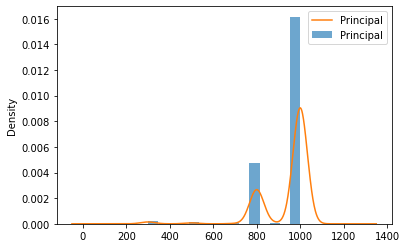

In [6]:
df['Principal'].plot(kind = "hist", density = True, alpha = 0.65, bins = 15)
# change density to true, because KDE uses density
# Plot KDE
df['Principal'].plot(kind = "kde")
plt.legend()
plt.show()

In [7]:
scipy.stats.describe(df.Principal, ddof=1, bias=False)

DescribeResult(nobs=500, minmax=(300, 1000), mean=943.2, variance=13280.320641282564, skewness=-2.7992032751287423, kurtosis=10.744967174908059)

### Terms

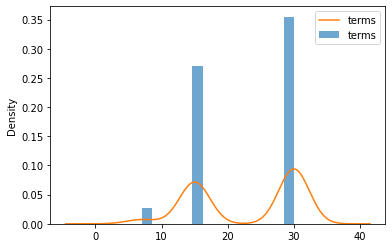

In [8]:
df['terms'].plot(kind = "hist", density = True, alpha = 0.65, bins = 15)
# change density to true, because KDE uses density
# Plot KDE
df['terms'].plot(kind = "kde")
plt.legend()
plt.show()

In [9]:
scipy.stats.describe(df.terms, ddof=1, bias=False)

DescribeResult(nobs=500, minmax=(7, 30), mean=22.824, variance=64.0010260521042, skewness=-0.3216021484650345, kurtosis=-1.624907629794091)

### Past Due Days

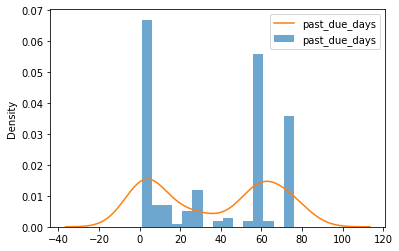

In [10]:
df['past_due_days'].plot(kind = "hist", density = True, alpha = 0.65, bins = 15)
# change density to true, because KDE uses density
# Plot KDE
df['past_due_days'].plot(kind = "kde")
plt.legend()
plt.show()

In [11]:
scipy.stats.describe(df.past_due_days, ddof=1, bias=False)

DescribeResult(nobs=500, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

### Age

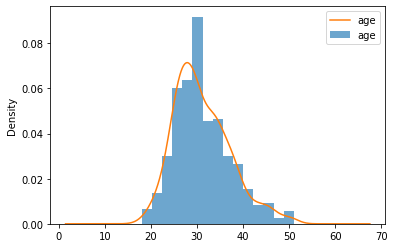

In [12]:
df['age'].plot(kind = "hist", density = True, alpha = 0.65, bins = 15)
# change density to true, because KDE uses density
# Plot KDE
df['age'].plot(kind = "kde")
plt.legend()
plt.show()

In [13]:
scipy.stats.describe(df.age, ddof=1, bias=False)

DescribeResult(nobs=500, minmax=(18, 51), mean=31.116, variance=37.02459318637275, skewness=0.7219702338351358, kurtosis=0.4029084281918265)

In [14]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


## b. Categorical Variables

In [15]:
# for column in ['loan_status','education','Gender']:
#     df[column].value_counts().plot(kind='bar')
#     plt.legend()
#     plt.show()

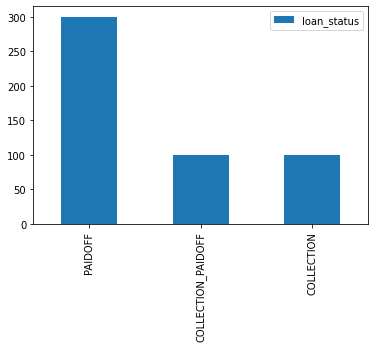

In [16]:
df['loan_status'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

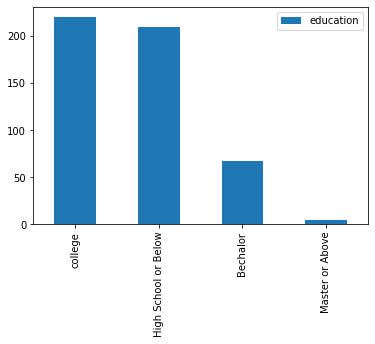

In [17]:
df['education'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

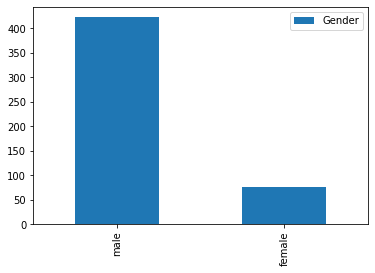

In [18]:
df['Gender'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

# 3. Population and Sample

In [19]:
df_sampling=df.groupby('loan_status',
                       group_keys=False).apply(lambda x: x.sample(min(len(x),
                                                                      min(np.unique(df['loan_status'],
                                                                                    return_counts=True)[1]))).sample(frac=1))

In [20]:
df_sampling.describe()

,Principal,terms,past_due_days,age
count,300.000000,300.000000,200.00000,300.000000
mean,953.333333,23.366667,36.01000,31.010000
std,90.088523,7.665600,29.38088,6.192824
min,500.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,26.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,50.000000


In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.4, stratify=df['loan_status'])

In [22]:
for column in df.select_dtypes('number').columns.to_list():
    print(column+":")
    print(sem(train[column]))

Principal:
6.3344187299703965
terms:
0.4642538356671099
past_due_days:
nan
age:
0.3584152637662516


In [23]:
for column in df.select_dtypes('number').columns.to_list():
    print(column+":")
    print(sem(test[column]))

Principal:
8.72125572997018
terms:
0.561195332308658
past_due_days:
nan
age:
0.41618496443662595


In [24]:
for column in df.select_dtypes('number').columns.to_list():
    print(column+":")
    print(sem(df_sampling[column]))

Principal:
5.201263317369959
terms:
0.44257363597793253
past_due_days:
nan
age:
0.35754286565442617


# 4. Types of Measures

# a. Frequency

In [25]:
pd.crosstab(index=df['age'], columns='count').reset_index()

col_0,age,count
0,18,1
1,19,2
2,20,4
3,21,7
4,22,8
5,23,10
6,24,23
7,25,20
8,26,46
9,27,38


In [26]:
pd.crosstab(index=df['Gender'], columns='count').reset_index()

col_0,Gender,count
0,female,77
1,male,423


# b. Central Tendency

## Mean

In [27]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


## Median

Quantitative Variables

In [28]:
for column in df.select_dtypes('number').columns.to_list():
    print(column)
    print(df[column].median())

Principal
1000.0
terms
30.0
past_due_days
37.0
age
30.0


Categorical Variables

In [29]:
categories=['male','female']
df.Gender = pd.Categorical(df.Gender, categories, ordered=False)
median_value = np.median(df['Gender'].cat.codes)
median_text = categories[int(median_value)]

In [30]:
# categories=['male','female']
df.Gender = pd.Categorical(df.Gender, ordered=False)
categories[int(np.median(df['Gender'].cat.codes))]

'male'

In [31]:
for column in df.select_dtypes('number').columns.to_list():
    print(column)
    print(statistics.mode(df[column]))

Principal
1000
terms
30
past_due_days
59.0
age
26


## Mode

In [32]:
for column in df.select_dtypes('number').columns.to_list():
    print(column)
    print(df[column].mode())

Principal
0    1000
dtype: int64
terms
0    30
dtype: int64
past_due_days
0    59.0
dtype: float64
age
0    26
dtype: int64


In [33]:
for column in ['loan_status','education','Gender']:
    print(column)
    print(df[column].mode())

loan_status
0    PAIDOFF
dtype: object
education
0    college
dtype: object
Gender
0    male
Name: Gender, dtype: category
Categories (2, object): ['male', 'female']


## c. Variability

### Quartile, IQR, Range, Standard Deviation

In [34]:
def describe_new(df):
    df1 = df.describe()
    df1.loc["range"] = df1.loc['max'] - df1.loc['min']
    df1.loc['iqr']=df1.loc['75%'] - df1.loc['25%']
    return df1

print (describe_new(df))

         Principal       terms  past_due_days         age
count   500.000000  500.000000      200.00000  500.000000
mean    943.200000   22.824000       36.01000   31.116000
std     115.240274    8.000064       29.38088    6.084784
min     300.000000    7.000000        1.00000   18.000000
25%    1000.000000   15.000000        3.00000   27.000000
50%    1000.000000   30.000000       37.00000   30.000000
75%    1000.000000   30.000000       60.00000   35.000000
max    1000.000000   30.000000       76.00000   51.000000
range   700.000000   23.000000       75.00000   33.000000
iqr       0.000000   15.000000       57.00000    8.000000


### Percentile

In [35]:
print(np.percentile(df['age'], 1))
print(np.percentile(df['age'], 95))
print(np.percentile(df['age'], 99))

20.0
43.0
49.00999999999999


### Standard Error

In [36]:
for column in df.select_dtypes('number').columns.to_list():
    print(column+":")
    print(sem(df[column]))

Principal:
5.153701706789511
terms:
0.3577737442912886
past_due_days:
nan
age:
0.2721198015079856


## d. Correlation

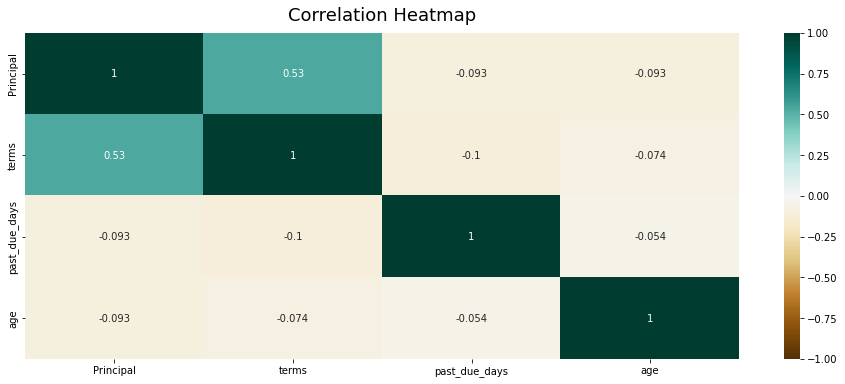

In [37]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Outliers

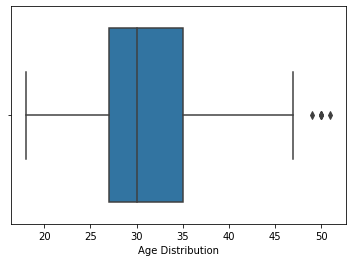

In [38]:
ax = sns.boxplot(x=df['age'])
ax.set_xlabel('Age Distribution')
plt.show()

# Using Pandas Profiling

In [39]:
import pandas_profiling as pp
profile = pp.ProfileReport(df, title="Loan Profile",sort=None)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]